Epoch: 0050 cost= 0.081289835 W= 0.213209 b= 1.06321
Epoch: 0100 cost= 0.080796719 W= 0.215373 b= 1.04765
Epoch: 0150 cost= 0.080360360 W= 0.217408 b= 1.03301
Epoch: 0200 cost= 0.079974145 W= 0.219322 b= 1.01924
Epoch: 0250 cost= 0.079632342 W= 0.221123 b= 1.00628
Epoch: 0300 cost= 0.079329841 W= 0.222816 b= 0.994102
Epoch: 0350 cost= 0.079062082 W= 0.224409 b= 0.982644
Epoch: 0400 cost= 0.078825124 W= 0.225907 b= 0.971868
Epoch: 0450 cost= 0.078615367 W= 0.227316 b= 0.961732
Epoch: 0500 cost= 0.078429729 W= 0.228641 b= 0.952201
Epoch: 0550 cost= 0.078265443 W= 0.229887 b= 0.943238
Epoch: 0600 cost= 0.078120008 W= 0.231058 b= 0.934807
Epoch: 0650 cost= 0.077991232 W= 0.232161 b= 0.926878
Epoch: 0700 cost= 0.077877253 W= 0.233197 b= 0.91942
Epoch: 0750 cost= 0.077776305 W= 0.234172 b= 0.912406
Epoch: 0800 cost= 0.077686943 W= 0.235089 b= 0.905809
Epoch: 0850 cost= 0.077607825 W= 0.235952 b= 0.899604
Epoch: 0900 cost= 0.077537760 W= 0.236763 b= 0.893767
Epoch: 0950 cost= 0.077475697 W= 0

Epoch: 7700 cost= 0.076990776 W= 0.249596 b= 0.80145
Epoch: 7750 cost= 0.076990768 W= 0.249596 b= 0.801447
Epoch: 7800 cost= 0.076990753 W= 0.249597 b= 0.801444
Epoch: 7850 cost= 0.076990746 W= 0.249597 b= 0.801441
Epoch: 7900 cost= 0.076990761 W= 0.249597 b= 0.801438
Epoch: 7950 cost= 0.076990761 W= 0.249598 b= 0.801435
Epoch: 8000 cost= 0.076990783 W= 0.249598 b= 0.801432
Epoch: 8050 cost= 0.076990761 W= 0.249599 b= 0.801427
Epoch: 8100 cost= 0.076990768 W= 0.2496 b= 0.801421
Epoch: 8150 cost= 0.076990761 W= 0.249601 b= 0.801415
Epoch: 8200 cost= 0.076990761 W= 0.249602 b= 0.801409
Epoch: 8250 cost= 0.076990746 W= 0.249602 b= 0.801403
Epoch: 8300 cost= 0.076990761 W= 0.249603 b= 0.801397
Epoch: 8350 cost= 0.076990768 W= 0.249604 b= 0.801392
Epoch: 8400 cost= 0.076990761 W= 0.249604 b= 0.80139
Epoch: 8450 cost= 0.076990761 W= 0.249605 b= 0.801387
Epoch: 8500 cost= 0.076990746 W= 0.249605 b= 0.801384
Epoch: 8550 cost= 0.076990761 W= 0.249606 b= 0.801381
Epoch: 8600 cost= 0.076990739 W=

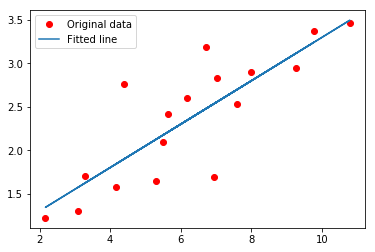

Testing... (Mean square loss Comparison)
Testing cost= 0.0791087
Absolute mean square loss difference: 0.00211795


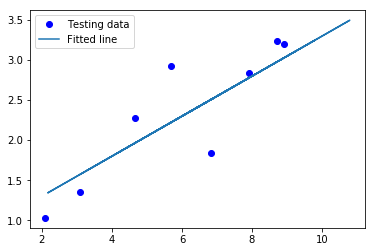

time taken =  82.45971012115479


In [14]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import time
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 10000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

tf.device('/gpu:0')
start_time = time.time()

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    end_time = time.time()
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()

print('time taken = ',end_time-start_time)